# Exercise.  Model Selection (part 2: big dataset)

**Exercise 1: Building the Best Linear Model**

This exercise involves working with a dataset called `model_selection_big.csv`. The dataset consists of 10 variables (features) and one independent variable (target). The goal is to explore the data and build the best possible linear model to predict the target variable. Follow the structured steps below to complete this task.

### Task Overview:

1. **Data Exploration**

   - Analyze correlations between variables.
   - Perform descriptive statistics for each feature and the target variable.
   - Identify potential outliers using statistical methods or visualizations.

2. **Data Splitting**

   - Divide the data into training, validation, and test sets.
   - Use the training set to train models, the validation set to tune and compare models, and the test set only for final model evaluation.
   - Ensure the splitting process is randomized and stratified if necessary.

3. **Baseline Model Creation**

   - Create a baseline model using the simplest linear regression algorithm.
   - Compute metrics on the validation set, including Mean Squared Error (MSE), Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and R-squared (R²).

4. **Model Exploration with Quadratic Terms**

   - Investigate potential non-linearities in the data by including quadratic terms in the models.
   - Systematically test various model configurations by including or excluding certain variables, quadratic terms, and interactions.
   - Compare models using well-defined criteria, such as the lowest MSE, AIC, or BIC.

5. **Cross-Validation (Optional)**

   - Perform cross-validation to validate the robustness of the selected models.
   - Report metrics across folds to assess consistency and reliability.

6. **Final Model Selection and Testing**

   - Choose the best-performing model based on validation metrics and cross-validation results.
   - Evaluate the final model using the test set and report its performance metrics.

### Expected Deliverables:

- A clear and concise report detailing each step of the process.
- Findings from data exploration.
- Splitting methodology and the resulting data partitions.
- Results and interpretation of the baseline model.
- Summary of the model exploration process and selected models.
- Cross-validation results, if performed.
- Final model performance on the test set.
- Well-commented code implementing the above steps.

### Notes:

- Ensure all assumptions of linear regression are checked and reported, such as normality of residuals and homoscedasticity.
- Clearly justify decisions made at each step, such as the choice of metrics and model selection criteria.
- Use appropriate visualizations to support your analysis.

Good luck!

--------------------------------------------------------------------

 ### Step 1: Imports and Load the Data

In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('model_selection_big.csv')
data.head(5)

,x1,x2,x3,x4,x5,x6,y
0,77.530921,1.675224,41.823291,19.264877,0.597026,12.591759,48.728655
1,117.265634,2.927729,56.763335,18.564996,-0.433364,-4.299495,105.532787
2,99.055293,2.623085,54.177797,18.483986,-2.550345,-3.185337,83.012687
3,98.284770,4.991911,48.885025,19.383066,0.514395,-1.502863,65.280703
4,90.218425,4.694187,49.884707,20.488432,1.566235,10.658678,40.453367


### Step 2: Data Exploration
**Correlation Analysis**

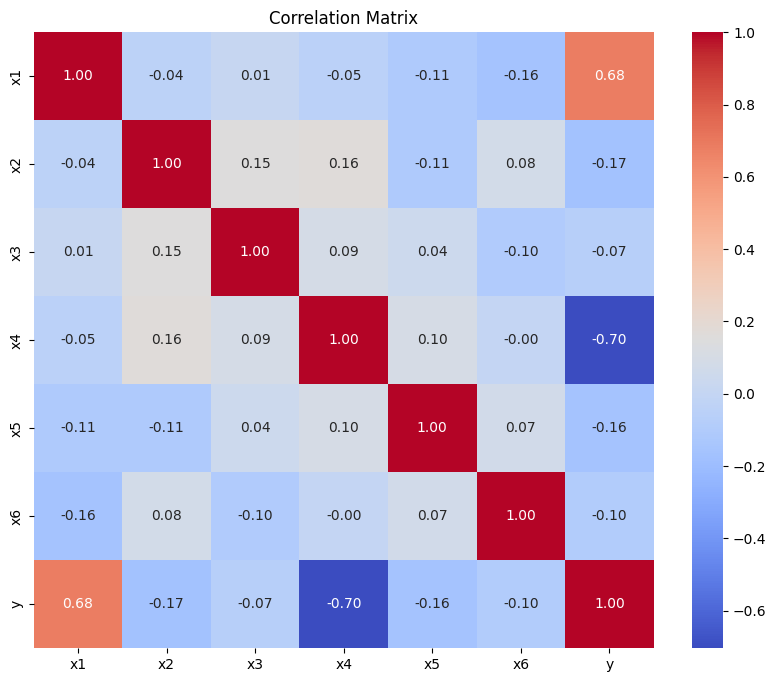

In [6]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Descriptive Statistics**

In [8]:
data.describe()

,x1,x2,x3,x4,x5,x6,y
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,98.294977,3.907986,50.343338,20.001143,-0.116465,-0.063314,63.036144
std,9.980503,1.038889,4.661378,1.917131,1.054390,5.263899,23.616404
min,76.319929,1.272606,37.895423,15.432620,-3.241672,-11.191040,13.070876
25%,90.226502,3.222298,47.023115,18.801799,-1.050602,-3.772203,48.166984
50%,97.840770,3.990042,50.784833,20.205589,-0.110735,-0.058474,62.084364
75%,105.698540,4.582638,53.326478,21.199295,0.693571,3.200078,75.337513
max,121.701312,6.591158,60.635100,24.708556,2.075324,12.591759,145.882101


**Outlier Detection**

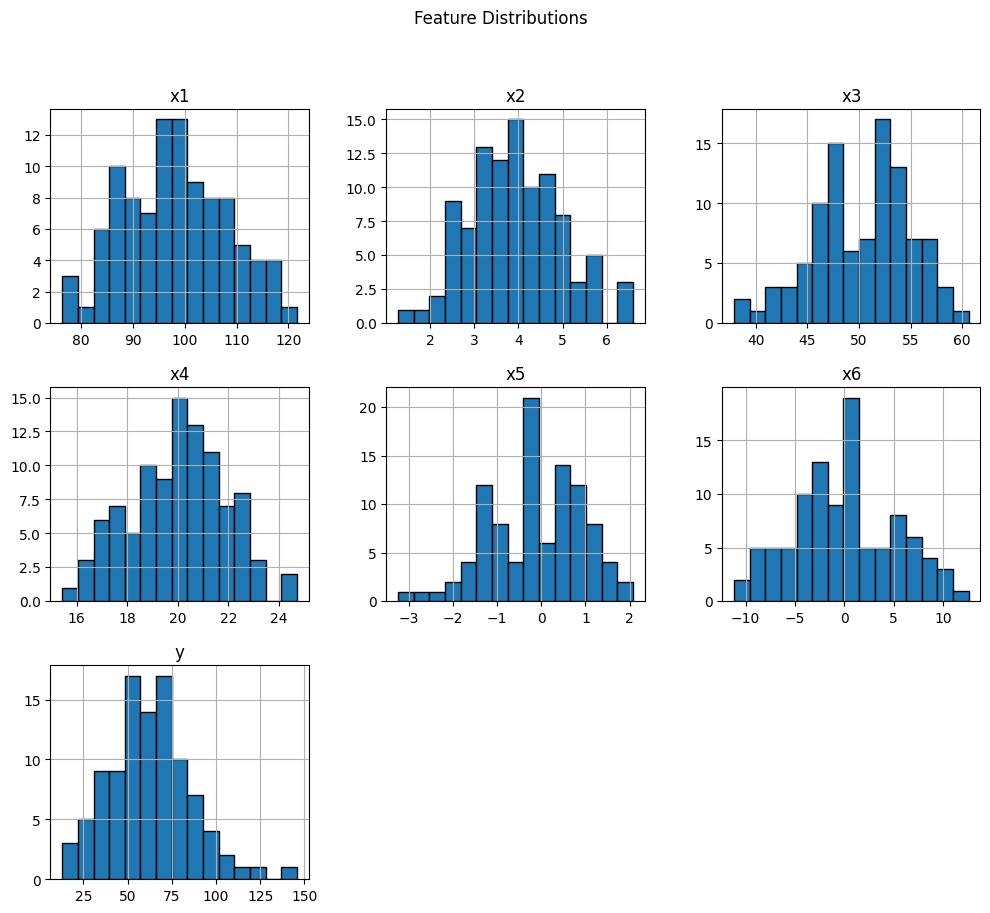

In [10]:
# Visualize distributions for each variable
data.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


**Remarks oin Data Exploration**: The data do not show signs of unusual things. No highly correlated variables and no outliers. 

 ### Step 3: Data Splitting in training, validation and test

In [13]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
y = data['y']

# First split: 60% training, 40% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=7976)

# Second split: Split the temp set equally into validation and test (20% each of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7976)

# Print sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 60
Validation set size: 20
Test set size: 20


### Step 4a: Create and Evaluate a Baseline Model with Statsmodels
Statsmodels provides detailed information about the regression, with a focus on interpretation, providing a summary is valuable for understanding the baseline model's performance and the statistical reliability of its parameters.

In [15]:
import statsmodels.api as sm


# Add a constant for the intercept
X_with_const = sm.add_constant(X_train)

# Fit a linear regression model
linear_model = sm.OLS(y_train, X_with_const).fit()

#extraction and calculation of mse
mse = (linear_model.resid ** 2).mean()

#extraction and calculation of r2
r2 = linear_model.rsquared

# Extract AIC and BIC
aic = linear_model.aic
bic = linear_model.bic

# Print results
print(f"Baseline Model MSE: {mse}")
print(f"Baseline Model R-squared: {r2}")
print("AIC:", aic)
print("BIC:", bic)


print('\nDetailed Results:\n',linear_model.summary())

Baseline Model MSE: 39.24320556486114
Baseline Model R-squared: 0.9196363984006188
AIC: 404.45932334152036
BIC: 419.11973527707505

Detailed Results:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     101.1
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.22e-27
Time:                        15:49:10   Log-Likelihood:                -195.23
No. Observations:                  60   AIC:                             404.5
Df Residuals:                      53   BIC:                             419.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

### Step 4b: Evaluating the model with Scikit-learn.
With Scikit-learn, we can compute metrics such as **Mean Squared Error (MSE)** and **R²**, but not **AIC** directly. However, you can use the following proxy formula for AIC:
$$
AIC=n⋅ln(MSE)+2⋅k
$$
While this proxy value is not directly comparable to the AIC calculated by Statsmodels (which uses the full log-likelihood and is more precise), it can still be used for comparing models within the same context to guide your choice. Keep in mind that this proxy is an approximation and should be interpreted accordingly.


In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a simple linear regression model
baseline_model = LinearRegression(fit_intercept=True)
baseline_model.fit(X_train, y_train)

# Predict on the training and validation sets
y_train_pred = baseline_model.predict(X_train)
y_val_pred = baseline_model.predict(X_val)

# Compute metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Compute AIC for training set
n_train = len(y_train)  # Number of training data points
k = X_train.shape[1] + 1  # Number of parameters (features + intercept)
aic_train = n_train * np.log(mse_train) + 2 * k

# Compute metrics for validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Compute AIC for validation set
n_val = len(y_val)  # Number of validation data points
aic_val = n_val * np.log(mse_val) + 2 * k

# Print results
print("Training Set Metrics:")
print(f"  MSE: {mse_train}")
print(f"  R²: {r2_train}")
print(f"  AIC: {aic_train}")

print("\nValidation Set Metrics:")
print(f"  MSE: {mse_val}")
print(f"  R²: {r2_val}")
print(f"  AIC: {aic_val}")



Training Set Metrics:
  MSE: 39.24320556486114
  R²: 0.9196363984006188
  AIC: 234.18669935695965

Validation Set Metrics:
  MSE: 58.32329119212684
  R²: 0.9045152148127639
  AIC: 95.3200303888722


### Step 5: Expanding the Model with Non-Linear Features
In this step, we enhance the model by including squared terms for all variables to capture potential non-linear relationships. We evaluate the extended model using both Statsmodels and Scikit-learn, comparing metrics such as MSE, R², and AIC (proxy for Scikit-learn).

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Add squared terms for all variables
X_train_squared = X_train.copy()
X_val_squared = X_val.copy()

for col in X_train.columns:
    X_train_squared[f"{col}^2"] = X_train[col] ** 2
    X_val_squared[f"{col}^2"] = X_val[col] ** 2

# Step 1: Evaluate with Statsmodels
# Add intercept for statsmodels
X_train_with_const = sm.add_constant(X_train_squared)
X_val_with_const = sm.add_constant(X_val_squared)

# Fit the model
stats_model = sm.OLS(y_train, X_train_with_const).fit()

# Predict and calculate metrics for validation
y_val_pred_stats = stats_model.predict(X_val_with_const)

# Compute validation MSE and R-squared
mse_val_stats = mean_squared_error(y_val, y_val_pred_stats)
r2_val_stats = r2_score(y_val, y_val_pred_stats)

# Print statsmodels summary
print("====Statsmodels Summary:====")
print(stats_model.summary())
print(f"Validation MSE (Statsmodels): {mse_val_stats}")
print(f"Validation R² (Statsmodels): {r2_val_stats}")

# Step 2: Evaluate with Scikit-learn
# Fit the model
sklearn_model = LinearRegression(fit_intercept=True)
sklearn_model.fit(X_train_squared, y_train)

# Predict and calculate metrics for training and validation
y_train_pred_sklearn = sklearn_model.predict(X_train_squared)
y_val_pred_sklearn = sklearn_model.predict(X_val_squared)

# Compute metrics for training
mse_train_sklearn = mean_squared_error(y_train, y_train_pred_sklearn)
r2_train_sklearn = r2_score(y_train, y_train_pred_sklearn)

# Compute AIC for training set
n_train = len(y_train)
k = X_train_squared.shape[1] + 1  # Features + intercept
aic_train_sklearn = n_train * np.log(mse_train_sklearn) + 2 * k

# Compute metrics for validation
mse_val_sklearn = mean_squared_error(y_val, y_val_pred_sklearn)
r2_val_sklearn = r2_score(y_val, y_val_pred_sklearn)

# Compute AIC for validation set
n_val = len(y_val)
aic_val_sklearn = n_val * np.log(mse_val_sklearn) + 2 * k

# Print Scikit-learn results
print("\n===Scikit-learn Results:====")
print(f"Training MSE: {mse_train_sklearn}")
print(f"Training R²: {r2_train_sklearn}")
print(f"Training AIC: {aic_train_sklearn}")
print(f"Validation MSE: {mse_val_sklearn}")
print(f"Validation R²: {r2_val_sklearn}")
print(f"Validation AIC: {aic_val_sklearn}")



====Statsmodels Summary:====
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     135.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.24e-32
Time:                        15:49:10   Log-Likelihood:                -163.68
No. Observations:                  60   AIC:                             353.4
Df Residuals:                      47   BIC:                             380.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        475.4714  

### Step 6. Model selection

Suppose we go over **all possible models** and compute a metric (e.g., **MSE** on the training data) to determine the *best model.* We could do something like this:

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error, r2_score

# Add squared terms for all features in training, validation, and test sets
X_train_expanded = X_train.copy()

for col in X_train.columns:
    X_train_expanded[f"{col}^2"] = X_train[col] ** 2



# Evaluate the model with training, validation, and test metrics
def evaluate_model(train_data, train_y, variables):
    """
    Evaluate a model by fitting on the training set and calculating metrics for training, validation, and test sets.
    """
    # Fit the model using Scikit-learn
    model = LinearRegression(fit_intercept=True)
    model.fit(train_data[variables], train_y)
    
    # Predict on training, validation, and test sets
    train_pred = model.predict(train_data[variables])

    
    # Compute metrics for training
    mse_train = mean_squared_error(train_y, train_pred)
    r2_train = r2_score(train_y, train_pred)
    
    n_train = len(train_y)
    k = len(variables) + 1  # Number of features + intercept
    aic_train = n_train  * np.log(mse_train ) + 2 * k
    bic_train = n_train  * np.log(mse_train ) + k * np.log(n_train)

    
    return (mse_train, r2_train,
            aic_train, bic_train)
           

# Table to store results
results = []
all_vars = X_train_expanded.columns

# Iterate over all combinations of predictors
for k in range(1, len(all_vars) + 1):
    for combo in itertools.combinations(all_vars, k):
        # Evaluate the model on training, validation, and test sets
        (mse_train, r2_train,
            aic_train, bic_train) = evaluate_model(
            X_train_expanded, y_train, list(combo)
        )
        
        # Store the results
        results.append({
            "Variables": combo,
            "MSE_Train": mse_train,
            "R2_Train": r2_train,
            "AIC_Train": aic_train,
            "BIC_Train": bic_train,
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by AIC on the validation set
results_df = results_df.sort_values(by="AIC_Train").reset_index(drop=True)

# Display the top results
print("Top Models by Validation AIC:")
print(results_df.head())

# Get the top 5 models and print their metrics
print("\nMetrics for Top 5 Models:")
top_5_models = results_df.head(5)


Top Models by Validation AIC:
                                        Variables  MSE_Train  R2_Train  \
0              (x1, x2, x3, x4, x2^2, x3^2, x6^2)  14.688578  0.969920   
1        (x1, x2, x3, x4, x1^2, x2^2, x3^2, x6^2)  14.224628  0.970870   
2  (x1, x2, x3, x4, x1^2, x2^2, x3^2, x4^2, x6^2)  13.923129  0.971488   
3                    (x1, x2, x3, x4, x2^2, x3^2)  15.432061  0.968398   
4        (x1, x2, x3, x4, x2^2, x3^2, x4^2, x6^2)  14.449754  0.970409   

    AIC_Train   BIC_Train  
0  177.224212  193.978968  
1  177.298492  196.147593  
2  178.013086  198.956531  
3  178.186836  192.847248  
4  178.240643  197.089744  

Metrics for Top 5 Models:


So, according to previous result, the best model is one which includes the variables (x1, x2, x3, x4, x2^2, x3^2, x6^2). I could now go and find that model as follows (using now stats model to get the full descriptipon of the model).

We can do this manually (as i'm going to do now) or find a clever way to autolmate the selection of the vest model (try it !)


In [23]:
import statsmodels.api as sm

# Add squared terms for all features in training, validation, and test sets
X_val_expanded = X_val.copy()
X_test_expanded = X_test.copy()

for col in X_train.columns:
    X_val_expanded[f"{col}^2"] = X_val[col] ** 2
    X_test_expanded[f"{col}^2"] = X_test[col] ** 2


# Define the selected variables for the best model
selected_variables = ['x1', 'x2', 'x3', 'x4', 'x2^2', 'x3^2',  'x6^2']

# Prepare the data for Statsmodels (add a constant for the intercept)
X_train_ols = sm.add_constant(X_train_expanded[selected_variables])
X_val_ols = sm.add_constant(X_val_expanded[selected_variables])
X_test_ols = sm.add_constant(X_test_expanded[selected_variables])


# Fit the model using Statsmodels OLS
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Display the full summary
print(ols_model.summary())

# Predict on validation and test sets
val_pred_ols = ols_model.predict(X_val_ols)
test_pred_ols = ols_model.predict(X_test_ols)

# Compute additional metrics for validation and test sets
mse_val = mean_squared_error(y_val, val_pred_ols)
r2_val = r2_score(y_val, val_pred_ols)
mse_test = mean_squared_error(y_test, test_pred_ols)
r2_test = r2_score(y_test, test_pred_ols)

# Print validation and test metrics
print("\nValidation Metrics:")
print(f"  MSE: {mse_val:.4f}")
print(f"  R²: {r2_val:.4f}")

print("\nTest Metrics:")
print(f"  MSE: {mse_test:.4f}")
print(f"  R²: {r2_test:.4f}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     239.5
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.09e-37
Time:                        15:49:18   Log-Likelihood:                -165.75
No. Observations:                  60   AIC:                             347.5
Df Residuals:                      52   BIC:                             364.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        482.8338     48.960      9.862      0.0

However, this would only identify the best model **based on the training set**, which might lead to overfitting. Instead, we should evaluate the models using the validation set to assess their predictive power.

So, let’s modify the approach: for each model, we will compute and store the metrics for **training**, **validation**, and (why not) **test** sets to ensure a comprehensive evaluation.

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error, r2_score

# Add squared terms for all features in training, validation, and test sets
X_train_expanded = X_train.copy()
X_val_expanded = X_val.copy()
X_test_expanded = X_test.copy()

for col in X_train.columns:
    X_train_expanded[f"{col}^2"] = X_train[col] ** 2
    X_val_expanded[f"{col}^2"] = X_val[col] ** 2
    X_test_expanded[f"{col}^2"] = X_test[col] ** 2

# Evaluate the model with training, validation, and test metrics
def evaluate_model(train_data, val_data, test_data, train_y, val_y, test_y, variables):
    """
    Evaluate a model by fitting on the training set and calculating metrics for training, validation, and test sets.
    """
    # Fit the model using Scikit-learn
    model = LinearRegression(fit_intercept=True)
    model.fit(train_data[variables], train_y)
    
    # Predict on training, validation, and test sets
    train_pred = model.predict(train_data[variables])
    val_pred = model.predict(val_data[variables])
    test_pred = model.predict(test_data[variables])
    
    # Compute metrics for training
    mse_train = mean_squared_error(train_y, train_pred)
    r2_train = r2_score(train_y, train_pred)
    
    n_train = len(train_y)
    k = len(variables) + 1  # Number of features + intercept
    aic_train = n_train  * np.log(mse_train ) + 2 * k
    bic_train = n_train  * np.log(mse_train ) + k * np.log(n_train)

    
    # Compute metrics for validation
    mse_val = mean_squared_error(val_y, val_pred)
    r2_val = r2_score(val_y, val_pred)
    n_val = len(val_y)
    k = len(variables) + 1  # Number of features + intercept
    aic_val = n_val * np.log(mse_val) + 2 * k
    bic_val = n_val * np.log(mse_val) + k * np.log(n_val)
    
    # Compute metrics for test
    mse_test = mean_squared_error(test_y, test_pred)
    r2_test = r2_score(test_y, test_pred)
    n_test = len(test_y)
    aic_test = n_test * np.log(mse_test) + 2 * k
    bic_test = n_test * np.log(mse_test) + k * np.log(n_test)
    
    return (mse_train, r2_train,
            mse_val, r2_val, aic_val, bic_val,
            mse_test, r2_test, aic_test, bic_test)


# Table to store results
results = []

# Iterate over all combinations of predictors
for k in range(1, len(all_vars) + 1):
    for combo in itertools.combinations(all_vars, k):
        # Evaluate the model on training, validation, and test sets
        (mse_train, r2_train,
            mse_val, r2_val, aic_val, bic_val,
            mse_test, r2_test, aic_test, bic_test) = evaluate_model(
            X_train_expanded, X_val_expanded, X_test_expanded, y_train, y_val, y_test, list(combo)
        )
        
        # Store the results
        results.append({
            "Variables": combo,
            "MSE_Train": mse_train,
            "R2_Train": r2_train,
            "AIC_Train": aic_train,
            "BIC_Train": bic_train,
            "MSE_Val": mse_val,
            "R2_Val": r2_val,
            "AIC_Val": aic_val,
            "BIC_Val": bic_val,
            "MSE_Test": mse_test,
            "R2_Test": r2_test,
            "AIC_Test": aic_test,
            "BIC_Test": bic_test
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by AIC on the validation set
results_df = results_df.sort_values(by="AIC_Val").reset_index(drop=True)

# Display the top results
print("Top Models by Validation AIC:")
print(results_df.head())

# Get the top 5 models and print their metrics
print("\nMetrics for Top 5 Models:")
top_5_models = results_df.head(5)



Top Models by Validation AIC:
                    Variables  MSE_Train  R2_Train   AIC_Train   BIC_Train  \
0        (x3, x4, x1^2, x3^2)  20.328068  0.958371  183.085677  210.312157   
1          (x1, x3, x4, x3^2)  18.911378  0.961273  183.085677  210.312157   
2  (x3, x4, x1^2, x3^2, x6^2)  18.960046  0.961173  183.085677  210.312157   
3    (x1, x3, x4, x3^2, x6^2)  17.244340  0.964686  183.085677  210.312157   
4      (x1, x2, x3, x4, x3^2)  16.345352  0.966527  183.085677  210.312157   

     MSE_Val    R2_Val    AIC_Val    BIC_Val   MSE_Test   R2_Test   AIC_Test  \
0  24.042884  0.960638  73.596781  78.575443  22.636834  0.957841  72.391568   
1  24.454844  0.959963  73.936566  78.915228  19.448362  0.963779  69.355257   
2  22.404853  0.963320  74.185552  80.159946  22.723412  0.957680  74.467915   
3  22.876048  0.962548  74.601808  80.576202  19.076650  0.964471  70.969301   
4  23.163878  0.962077  74.851882  80.826276  25.741682  0.952058  76.962231   

    BIC_Test  
0  77

and we can now select the best model based on the validation data, (x3, x4, x1^2, x3^2) so, if we analyze that lmodel in detail now

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     316.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           2.95e-37
Time:                        15:49:36   Log-Likelihood:                -175.50
No. Observations:                  60   AIC:                             361.0
Df Residuals:                      55   BIC:                             371.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        566.8340     54.073     10.483      0.0

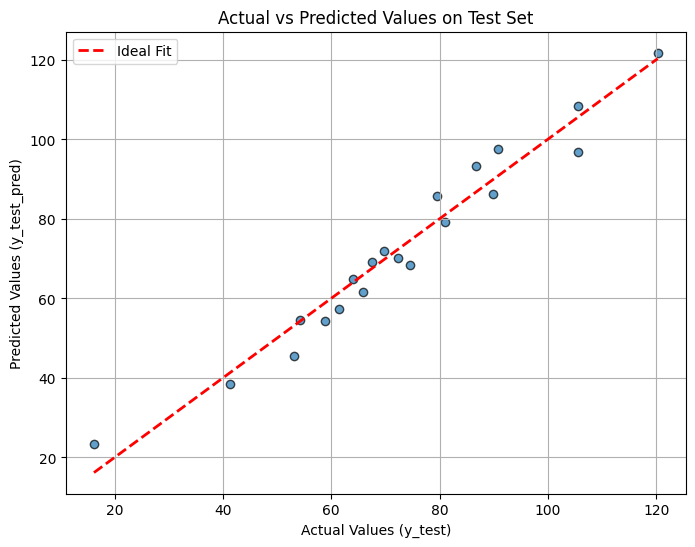

In [27]:

# Define the selected variables for the best model
selected_variables = [ 'x3', 'x4', 'x1^2',  'x3^2']

# Prepare the data for Statsmodels (add a constant for the intercept)
X_train_ols = sm.add_constant(X_train_expanded[selected_variables])
X_val_ols = sm.add_constant(X_val_expanded[selected_variables])
X_test_ols = sm.add_constant(X_test_expanded[selected_variables])

# Fit the model using Statsmodels OLS
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Display the full summary
print(ols_model.summary())

# Predict on validation and test sets
val_pred_ols = ols_model.predict(X_val_ols)
test_pred_ols = ols_model.predict(X_test_ols)

# Compute additional metrics for validation and test sets
mse_val = mean_squared_error(y_val, val_pred_ols)
r2_val = r2_score(y_val, val_pred_ols)
mse_test = mean_squared_error(y_test, test_pred_ols)
r2_test = r2_score(y_test, test_pred_ols)

# Print validation and test metrics
print("\nValidation Metrics:")
print(f"  MSE: {mse_val:.4f}")
print(f"  R²: {r2_val:.4f}")

print("\nTest Metrics:")
print(f"  MSE: {mse_test:.4f}")
print(f"  R²: {r2_test:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred_ols, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted Values on Test Set')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.legend()
plt.grid(True)
plt.show()